In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [14]:
# reading csv file
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [15]:
# checking the first five element
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# shape of data
stroke_data.shape

(5110, 12)

In [17]:
# gathering the information
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
# checking the null value of every column
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
# since bmi has many null value we will replace it with mean
stroke_data=stroke_data.replace(to_replace=np.nan,value=stroke_data.mean())

In [21]:
# checking null values
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [22]:
correlation=stroke_data.corr()

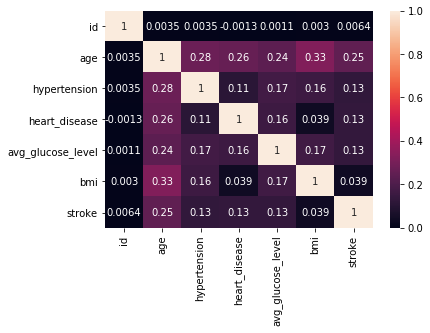

In [23]:
sns.heatmap(correlation,annot=True)

In [24]:
stroke_data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [25]:
stroke_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [26]:
stroke_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [27]:
stroke_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [28]:
stroke_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
stroke_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

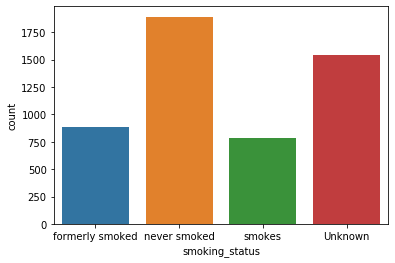

In [30]:
# count of smoking status
sns.countplot(x=stroke_data['smoking_status'])

In [31]:
# as for clarification we will treat 'Unknown' as a null value and replace it
stroke_data['smoking_status'].replace(to_replace='Unknown',value=stroke_data['smoking_status'].mode()[0],inplace=True)

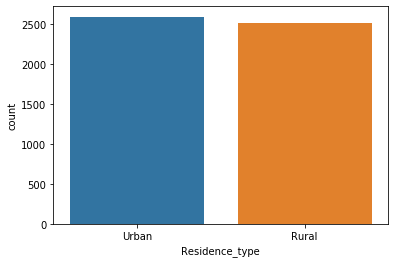

In [32]:
sns.countplot(x=stroke_data['Residence_type'])

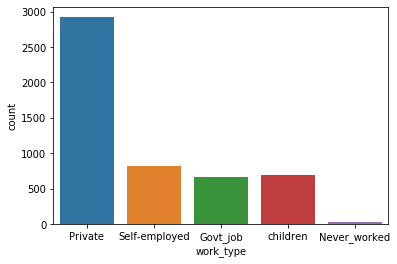

In [33]:
sns.countplot(x=stroke_data['work_type'])

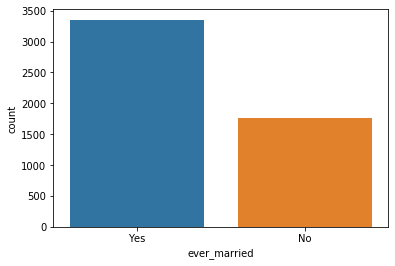

In [34]:
sns.countplot(x=stroke_data['ever_married'])

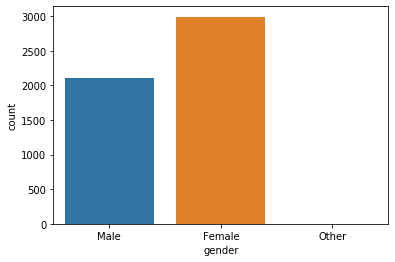

In [35]:
sns.countplot(x=stroke_data['gender'])

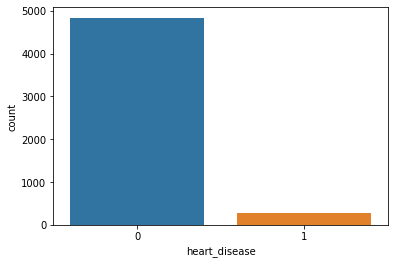

In [36]:
sns.countplot(x=stroke_data['heart_disease'])

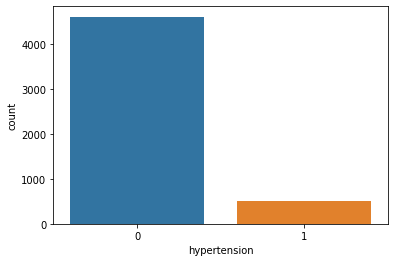

In [37]:
sns.countplot(x=stroke_data['hypertension'])

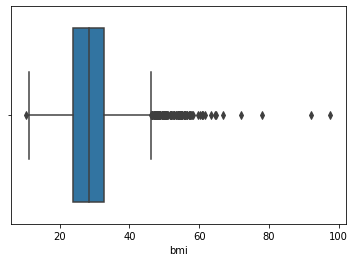

In [38]:
sns.boxplot(x='bmi',data=stroke_data)

In [39]:
def remove_outliers(data):
    arr=[]
    #print(max(list(data)))
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    #print(mi,ma)
    for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr


In [40]:
stroke_data['bmi']=remove_outliers(stroke_data['bmi'])

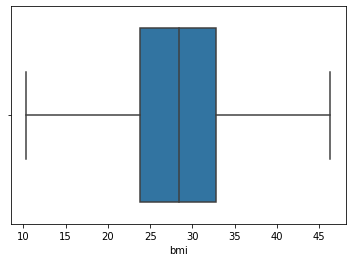

In [41]:
sns.boxplot(x='bmi',data=stroke_data)

In [42]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


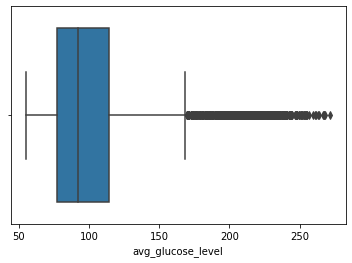

In [43]:
sns.boxplot(x='avg_glucose_level',data=stroke_data)

In [44]:
stroke_data['avg_glucose_level']=remove_outliers(stroke_data['avg_glucose_level'])

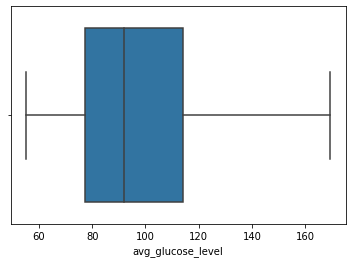

In [45]:
sns.boxplot(x='avg_glucose_level',data=stroke_data)

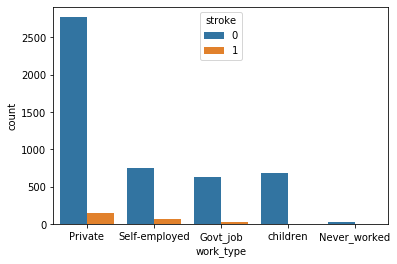

In [46]:
# relation between age and stroke
sns.countplot(x='work_type',hue='stroke',data=stroke_data)

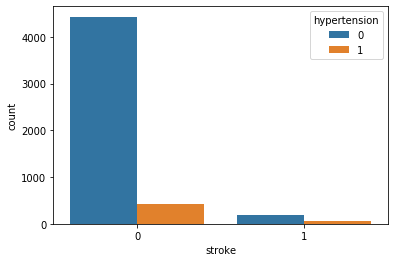

In [47]:
# relationship between smoking status and stroke
sns.countplot(hue='hypertension',x='stroke',data=stroke_data)


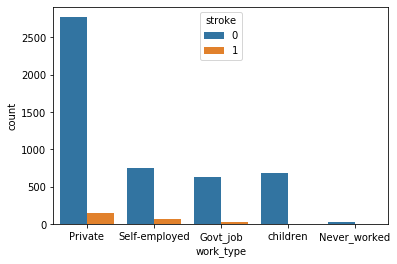

In [48]:
sns.countplot(x='work_type',hue='stroke',data=stroke_data)

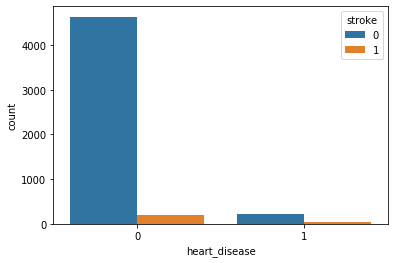

In [49]:
sns.countplot(x='heart_disease',hue='stroke',data=stroke_data)

In [50]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label_encoder=LabelEncoder()

In [53]:
data=stroke_data.apply(label_encoder.fit_transform)

In [54]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3374,240,0,1
1,3610,0,82,0,0,1,3,0,3374,162,1,1
2,2151,1,101,0,1,1,2,0,2483,199,1,1
3,4226,0,70,0,0,1,2,1,3374,218,2,1
4,114,0,100,1,0,1,3,0,3374,113,1,1


In [55]:
data['smoking_status'].unique()

array([0, 1, 2])

In [56]:
correl=data.corr(method='pearson')
#sns.heatmap(correl,annot=True)
correl

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002617,0.002116,0.003553,-0.001205,0.013654,-0.015510,-0.001142,-0.044590,0.006102,-0.004641,0.006499
gender,0.002617,1.000000,-0.030616,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.048455,-0.023634,-0.022364,0.008929
age,0.002116,-0.030616,1.000000,0.273891,0.260691,0.678447,-0.370303,0.013461,0.130598,0.359657,-0.108570,0.242122
hypertension,0.003553,0.020994,0.273891,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.110322,0.156619,-0.019199,0.127904
heart_disease,-0.001205,0.085447,0.260691,0.108306,1.000000,0.114644,-0.028023,0.003092,0.101032,0.047025,-0.016367,0.134914
ever_married,0.013654,-0.031005,0.678447,0.164243,0.114644,1.000000,-0.352722,0.006261,0.092743,0.358054,-0.046820,0.108340
work_type,-0.015510,0.056422,-0.370303,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.021705,-0.317836,-0.020051,-0.032316
Residence_type,-0.001142,-0.006738,0.013461,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.013046,0.004348,0.012160,0.015458
avg_glucose_level,-0.044590,0.048455,0.130598,0.110322,0.101032,0.092743,-0.021705,-0.013046,1.000000,0.106721,-0.012065,0.079385
bmi,0.006102,-0.023634,0.359657,0.156619,0.047025,0.358054,-0.317836,0.004348,0.106721,1.000000,-0.017851,0.045694


In [57]:
data.drop(['id'],axis=1,inplace=True)

In [58]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3374,240,0,1
1,0,82,0,0,1,3,0,3374,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3374,218,2,1
4,0,100,1,0,1,3,0,3374,113,1,1


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x=data.drop('stroke',axis=1)
y=data['stroke']

In [61]:
x.shape

(5110, 10)

In [62]:
y.shape

(5110,)

In [63]:
x.shape

(5110, 10)

In [64]:
y.shape

(5110,)

In [65]:
x_Train,x_Test,y_Train,y_Test= train_test_split(x,y,test_size=0.4,random_state=40)

In [66]:
features=list(x_Train.columns)

In [67]:
features

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

# Decision Tree

In [68]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_Train,y_Train)

In [69]:
pred1=dtree.predict(x_Test)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print(accuracy_score(y_Test,pred1)*100,'%')

91.34050880626224 %


In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_Test,pred1)
print(cm)

[[1849  101]
 [  76   18]]


In [72]:
def precision(cm):
    return cm[1][1]/(cm[1][1]+cm[0][1])

print(precision(cm))

0.15126050420168066


In [73]:
def recall(cm):
    return cm[1][1]/(cm[1][1]+cm[1][0])

recall(cm)                                    

0.19148936170212766

In [74]:
def specificity(cm):
    return cm[0][0]/(cm[0][0]+cm[0][1])

specificity(cm)

0.9482051282051283

In [75]:
f1_score(y_Test,pred1)

0.16901408450704225

#  Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [77]:
# x=data.drop('stroke',axis=1)
# y=data['stroke']


In [78]:
# sc=MinMaxScaler(feature_range=(0,1))
# X=sc.fit_transform(X)

In [79]:
#x_Train,x_Test,y_Train,y_Test= train_test_split(x,y,test_size=0.4,random_state=42)

In [80]:
lg=LogisticRegression(max_iter=10000)

In [81]:
lg=lg.fit(x_Train,y_Train)

In [82]:
pred2=lg.predict(x_Test)

In [83]:
print(accuracy_score(y_Test,pred2)*100,'%')

95.45009784735812 %


In [84]:
cm2=confusion_matrix(y_Test,pred2)
cm2

array([[1950,    0],
       [  93,    1]])

In [85]:
precision(cm2)

1.0

In [86]:
recall(cm2)

0.010638297872340425

In [87]:
specificity(cm2)

1.0

In [88]:
f1_score(y_Test,pred2)

0.021052631578947368